In [1]:
import numpy as np, os, argparse, sys
from collections import Counter
from pathlib import Path
from utils import params, makeDataLoader, plot_training, plot_lr
import torch, random

from model import train_model


torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

def load_data():

    data_train = {'label': np.load('data/y_train.npy')-1, 'imgs': np.load('data/x_train.npy')}
    data_test = {'label': np.load('data/y_test.npy')-1, 'imgs': np.load('data/x_test.npy')}

    print('Train data shape: ', data_train['imgs'].shape)
    return data_train, data_test

ep = params.ep
bs = params.bs
upper_lr = params.upper_lr
lower_lr = params.lower_lr
plane_lr = params.plane_lr

output = params.output

if not Path('data/x_train.npy').exists():
    os.system('wget -q https://www.dropbox.com/s/sakfqp6o8pbgasm/data.tgz')
    os.system('tar xvzf data.tgz; rm *.tgz; rm ._*; mkdir data; mv *.npy data')
    
data_train, data_test = load_data()

trainloader, devloader = makeDataLoader(crop_size=250, data_train=data_train, data_test=data_test, batch_size=bs)

if not Path(output).exists():
    os.mkdir(output)

/home/labadier/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


Train data shape:  (791, 250, 250, 3)


Change on epoch 25


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


Total number of parameters:  27925396


Epoch:   0: : 25it [00:23,  1.06it/s, loss:2.982 f1:0.065 error:0.882 dev_loss: 2.993 f1_dev:0.005 dev_error:0.948]
Epoch:   1: : 25it [00:18,  1.34it/s, loss:2.898 f1:0.309 error:0.631 dev_loss: 2.983 f1_dev:0.037 dev_error:0.915]
Epoch:   2: : 25it [00:18,  1.36it/s, loss:2.753 f1:0.401 error:0.518 dev_loss: 2.818 f1_dev:0.177 dev_error:0.761]
Epoch:   3: : 25it [00:18,  1.34it/s, loss:2.544 f1:0.430 error:0.501 dev_loss: 2.453 f1_dev:0.301 dev_error:0.622]
Epoch:   4: : 25it [00:18,  1.35it/s, loss:2.288 f1:0.474 error:0.464 dev_loss: 2.114 f1_dev:0.373 dev_error:0.560]
Epoch:   5: : 25it [00:18,  1.34it/s, loss:2.031 f1:0.551 error:0.394 dev_loss: 1.850 f1_dev:0.479 dev_error:0.471]
Epoch:   6: : 25it [00:18,  1.35it/s, loss:1.802 f1:0.591 error:0.354 dev_loss: 1.645 f1_dev:0.507 dev_error:0.441]
Epoch:   7: : 25it [00:18,  1.36it/s, loss:1.583 f1:0.677 error:0.273 dev_loss: 1.464 f1_dev:0.582 dev_error:0.365]
Epoch:   8: : 25it [00:18,  1.34it/s, loss:1.394 f1:0.710 error:0.243 de

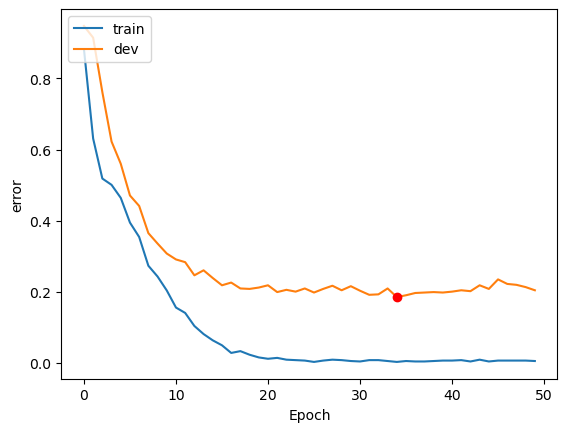

In [6]:
history, model, lr_history = train_model(trainloader, devloader, epoches = ep, batch_size = bs, 
                                lower_lr= lower_lr, upper_lr=upper_lr, output=os.path.join(output, 'best_model'), freeze_at=-1)
plot_training(history, output)

In [7]:
index = np.argmin(history['dev_error'])
print(f'Model Checkpoint saved at epoch {index} with accuracy {1 - history["dev_error"][index]:.3f}')

Model Checkpoint saved at epoch 34 with accuracy 0.815


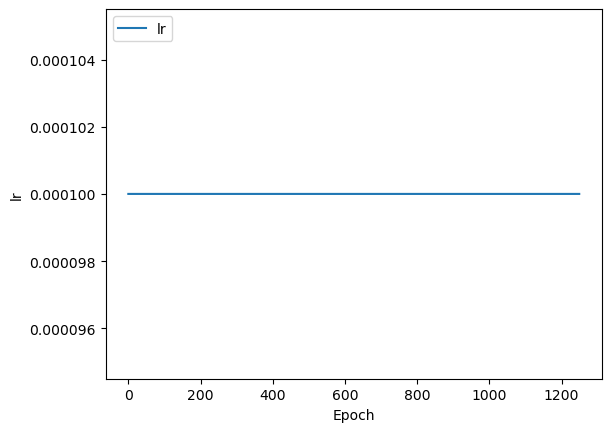

In [8]:
plot_lr(lr_history, output)

In [9]:
max(lr_history[900:])

0.0001

Train data distribution:  Counter({19: 46, 5: 45, 15: 44, 7: 44, 14: 43, 2: 43, 3: 42, 12: 41, 13: 41, 18: 41, 4: 41, 8: 41, 6: 39, 10: 38, 11: 37, 16: 36, 17: 35, 9: 33, 1: 32, 0: 29})
Test data distribution:  Counter({19: 46, 7: 45, 5: 44, 14: 43, 2: 43, 13: 42, 15: 42, 3: 42, 12: 41, 8: 41, 18: 40, 4: 39, 6: 39, 10: 38, 17: 37, 11: 36, 16: 35, 9: 33, 1: 32, 0: 26})


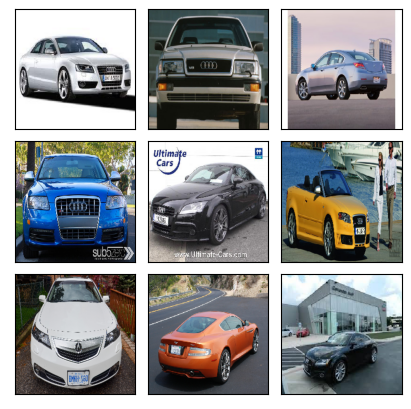

In [3]:
from matplotlib import pyplot as plt

print('Train data distribution: ', Counter(data_train['label']))
print('Test data distribution: ', Counter(data_test['label']))

indices = np.random.choice(np.arange(0, len(data_train['imgs'])), size=9, replace=False)

images = np.concatenate((data_train['imgs'][indices], data_train['imgs'][indices]), axis=0)[np.random.permutation(9)]
images = images.reshape(3, 3, 250, 250, 3)
fig, axs = plt.subplots(3, 3, figsize=(5, 5))

for i in range(3):
    for j in range(3): 
        ax = axs[i, j] 
        ax.imshow(images[i, j])
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
plt.subplots_adjust(wspace=0.1, hspace=0.1)        
plt.show()

(0.0, 50.0)

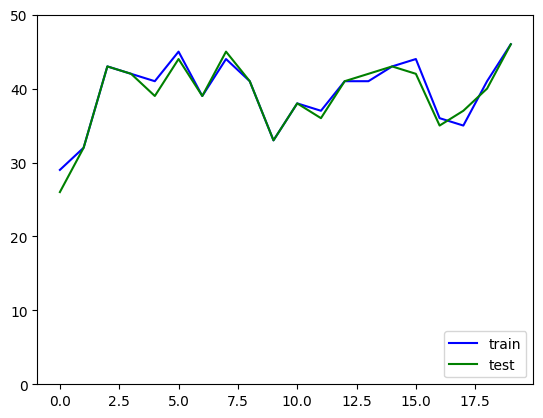

In [46]:
import seaborn as sns
counter_train = Counter(data_train['label'])
counter_test = Counter(data_test['label'])
plt.clf()
sns.lineplot([counter_train[i] for i in range(20)], label='train', c='b', linestyle="-")
sns.lineplot([counter_test[i] for i in range(20)], label='test',c='g', linestyle="-")
plt.legend( loc='lower right')
plt.ylim(0, 50)